
First few rows of the dataset:
           Index Accident_Severity Accident Date   Latitude  \
0  200701BS64157           Serious    05-06-2019  51.506187   
1  200701BS65737           Serious    02-07-2019  51.495029   
2  200701BS66127           Serious    26-08-2019  51.517715   
3  200701BS66128           Serious    16-08-2019  51.495478   
4  200701BS66837            Slight    03-09-2019  51.488576   

              Light_Conditions           District Area  Longitude  \
0        Darkness - lights lit  Kensington and Chelsea  -0.209082   
1                     Daylight  Kensington and Chelsea  -0.173647   
2  Darkness - lighting unknown  Kensington and Chelsea  -0.210215   
3                     Daylight  Kensington and Chelsea  -0.202731   
4        Darkness - lights lit  Kensington and Chelsea  -0.192487   

   Number_of_Casualties  Number_of_Vehicles Road_Surface_Conditions  \
0                     1                   2                     Dry   
1                     1         

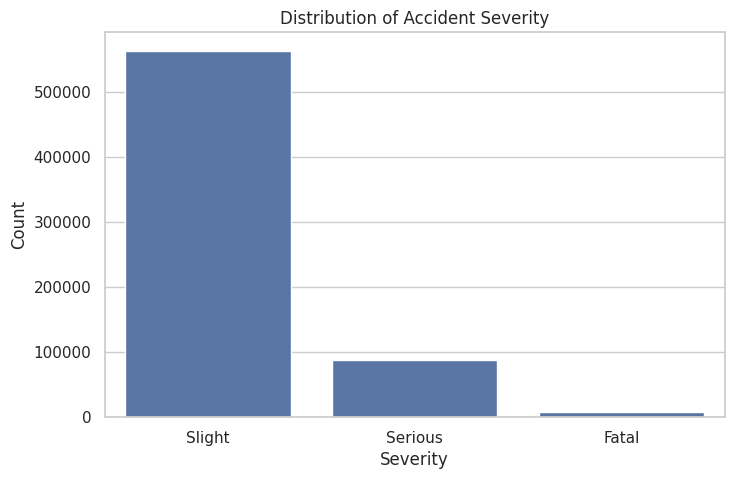

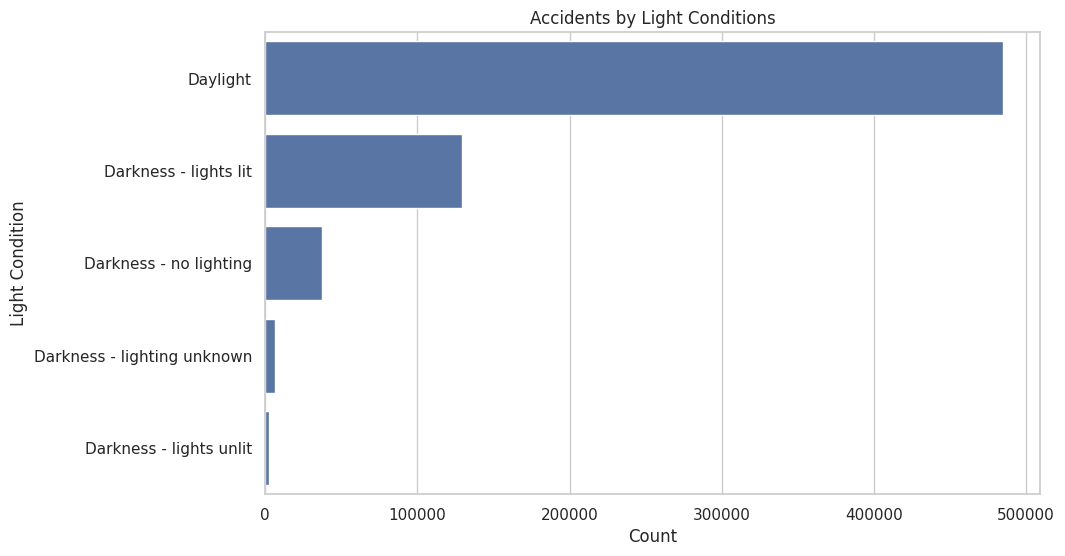

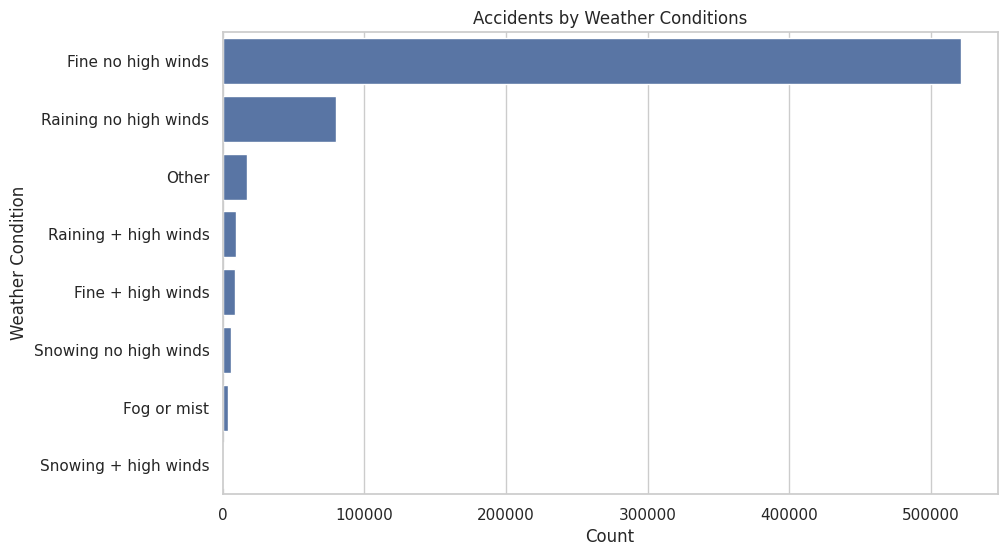

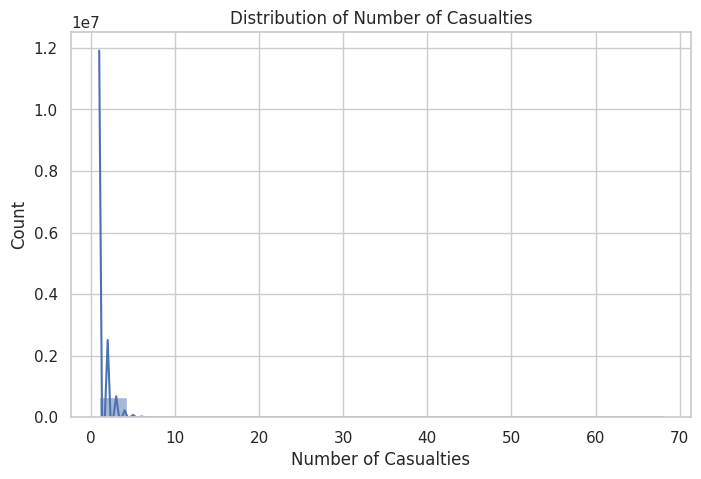

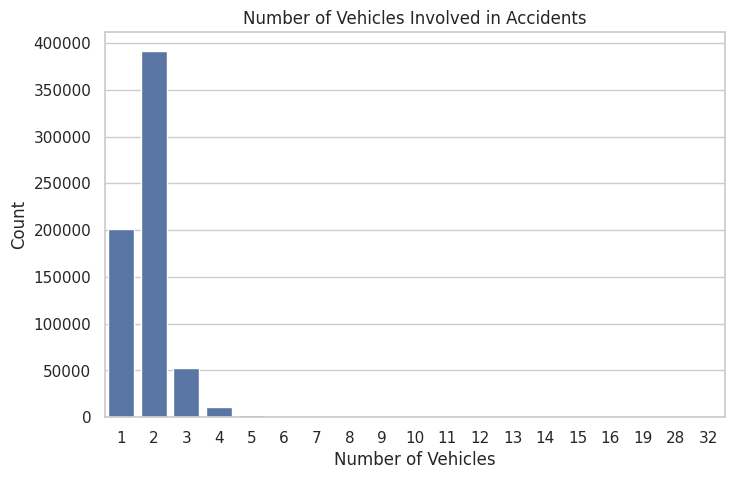

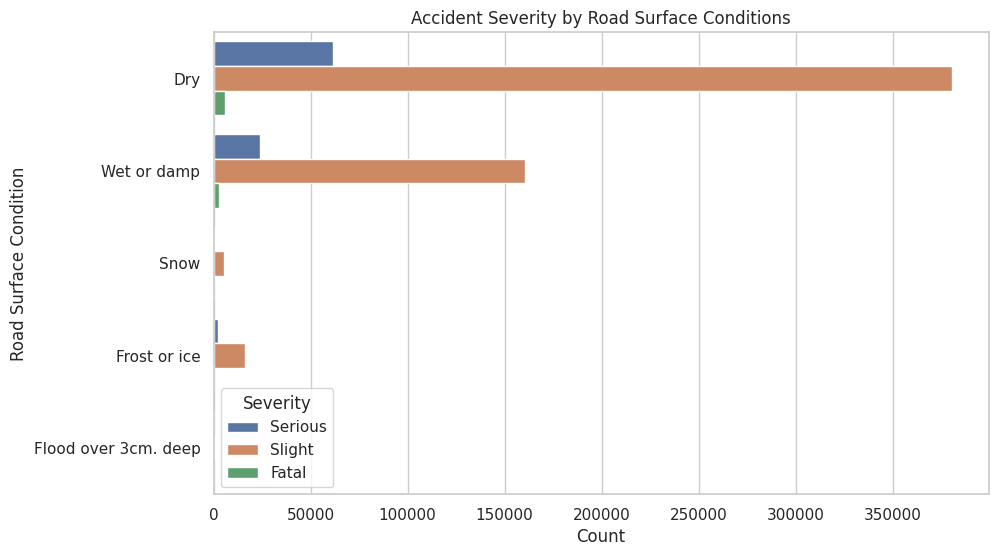

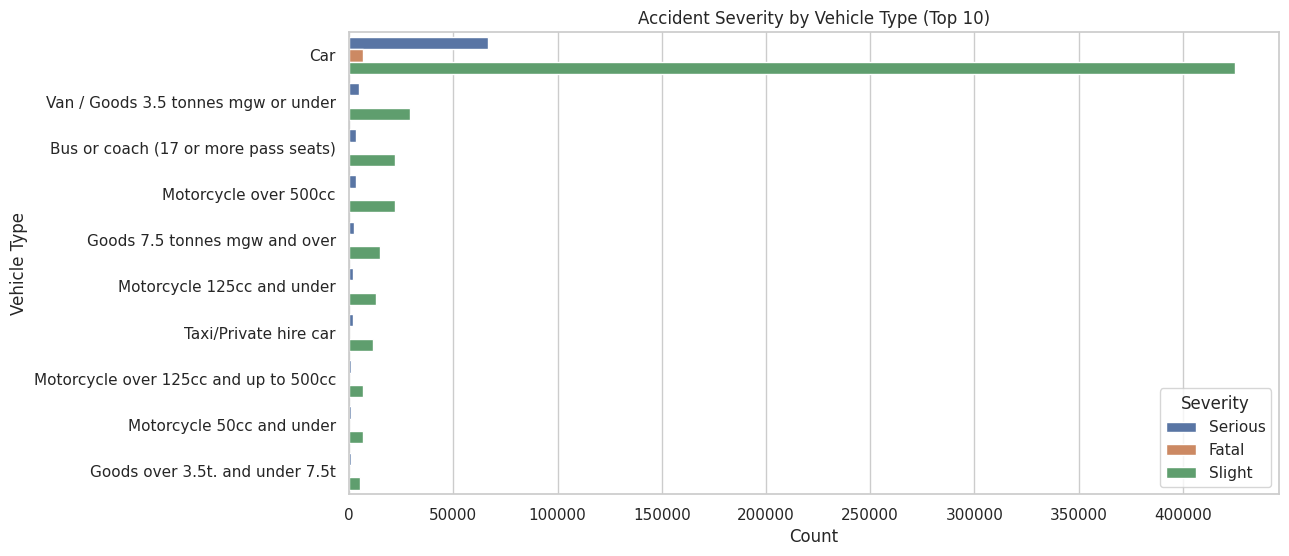

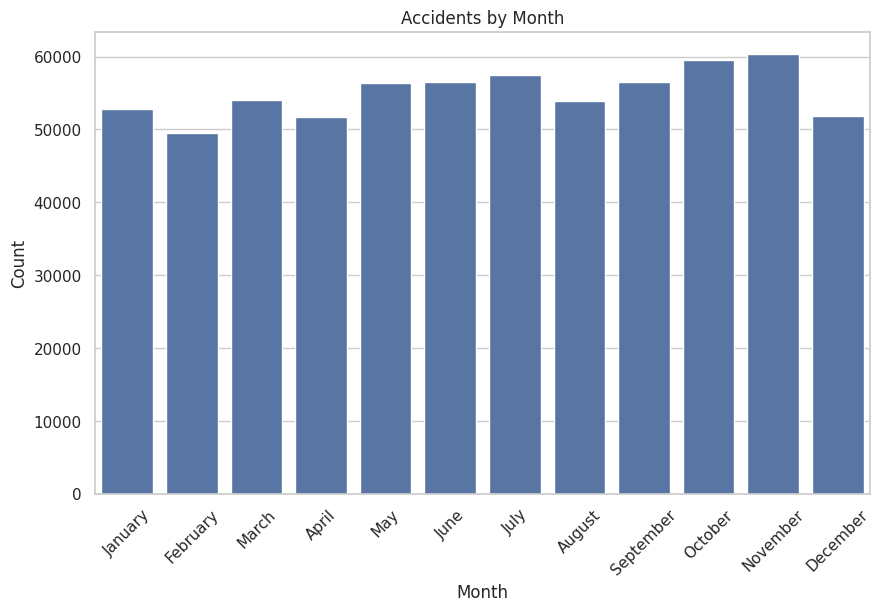

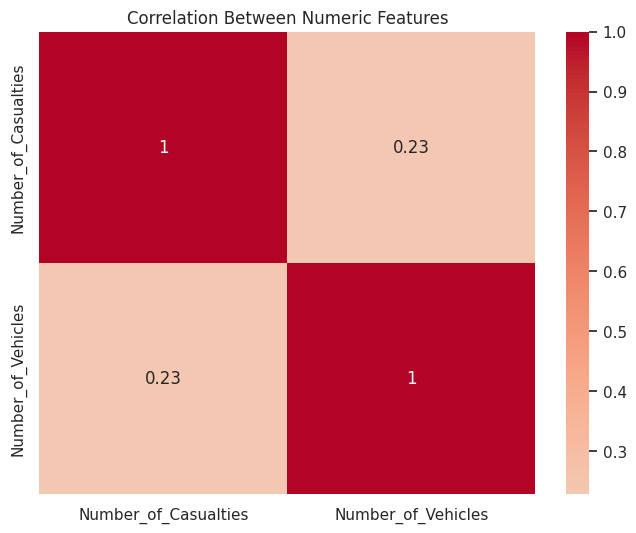

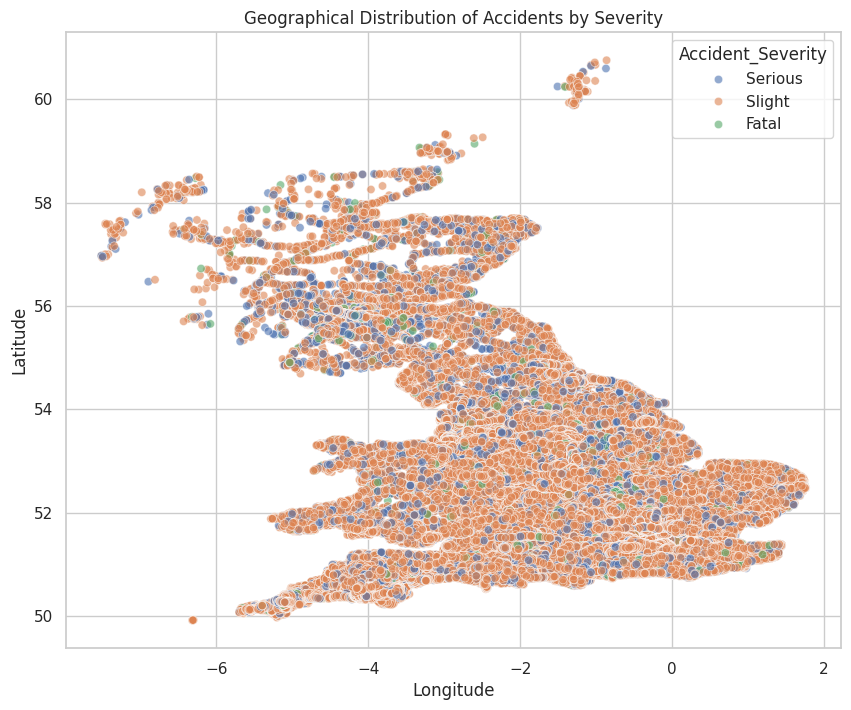


Key Findings:
1. The dataset contains 660679 accident records with 15 features each.
2. Most common accident severity: Slight
3. Most accidents occur during: Daylight
4. Most common weather condition during accidents: Fine no high winds
5. Most common road surface condition: Dry
6. Average number of casualties per accident: 1.36
7. Average number of vehicles involved per accident: 1.83
8. Most common vehicle type involved in accidents: Car

Suggestions for Further Analysis:
1. Investigate the relationship between weather conditions and accident severity.
2. Analyze temporal patterns (hourly, daily, monthly) of accidents.
3. Examine the distribution of accidents across different districts.
4. Explore the correlation between number of vehicles and number of casualties.
5. Build predictive models to identify factors contributing to severe accidents.


In [3]:
# Load the Dataset
import pandas as pd

# Read the dataset
df = pd.read_csv('accident data.csv')

# Data Exploration
# Display first few rows
print("\nFirst few rows of the dataset:")
print(df.head())

# Shape of the dataset
print("\nShape of the dataset:", df.shape)

# Column names
print("\nColumns in the dataset:", df.columns.tolist())

# Data types and non-null values
print("\nData types and non-null counts:")
print(df.info())

# Summary statistics for numeric features
print("\nSummary statistics for numeric features:")
print(df.describe())

# Check for Missing Values and Duplicates
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:", df.duplicated().sum())

# Visualize Key Features
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for plots
sns.set(style="whitegrid")

# Distribution of Accident Severity
plt.figure(figsize=(8, 5))
sns.countplot(x='Accident_Severity', data=df, order=df['Accident_Severity'].value_counts().index)
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

# Accidents by Light Conditions
plt.figure(figsize=(10, 6))
sns.countplot(y='Light_Conditions', data=df, order=df['Light_Conditions'].value_counts().index)
plt.title('Accidents by Light Conditions')
plt.xlabel('Count')
plt.ylabel('Light Condition')
plt.show()

# Accidents by Weather Conditions
plt.figure(figsize=(10, 6))
sns.countplot(y='Weather_Conditions', data=df, order=df['Weather_Conditions'].value_counts().index)
plt.title('Accidents by Weather Conditions')
plt.xlabel('Count')
plt.ylabel('Weather Condition')
plt.show()

# Number of Casualties distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Number_of_Casualties'], bins=20, kde=True)
plt.title('Distribution of Number of Casualties')
plt.xlabel('Number of Casualties')
plt.ylabel('Count')
plt.show()

# Number of Vehicles involved
plt.figure(figsize=(8, 5))
sns.countplot(x='Number_of_Vehicles', data=df)
plt.title('Number of Vehicles Involved in Accidents')
plt.xlabel('Number of Vehicles')
plt.ylabel('Count')
plt.show()

# Accident Severity by Road Surface Conditions
plt.figure(figsize=(10, 6))
sns.countplot(y='Road_Surface_Conditions', hue='Accident_Severity', data=df)
plt.title('Accident Severity by Road Surface Conditions')
plt.xlabel('Count')
plt.ylabel('Road Surface Condition')
plt.legend(title='Severity')
plt.show()

# Accident Severity by Vehicle Type (top 10 vehicle types)
top_vehicles = df['Vehicle_Type'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(y='Vehicle_Type', hue='Accident_Severity',
              data=df[df['Vehicle_Type'].isin(top_vehicles)],
              order=top_vehicles)
plt.title('Accident Severity by Vehicle Type (Top 10)')
plt.xlabel('Count')
plt.ylabel('Vehicle Type')
plt.legend(title='Severity')
plt.show()

# Temporal Analysis - Accidents by Month
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst=True)
df['Month'] = df['Accident Date'].dt.month_name()

plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Correlation between numeric features
numeric_cols = ['Number_of_Casualties', 'Number_of_Vehicles']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Numeric Features')
plt.show()

# Geographical Analysis (if coordinates are available)
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Accident_Severity', alpha=0.6)
    plt.title('Geographical Distribution of Accidents by Severity')
    plt.show()

# Key Findings Report
print("\nKey Findings:")
print("1. The dataset contains", df.shape[0], "accident records with", df.shape[1], "features each.")
print("2. Most common accident severity:", df['Accident_Severity'].mode()[0])
print("3. Most accidents occur during:", df['Light_Conditions'].mode()[0])
print("4. Most common weather condition during accidents:", df['Weather_Conditions'].mode()[0])
print("5. Most common road surface condition:", df['Road_Surface_Conditions'].mode()[0])
print("6. Average number of casualties per accident:", round(df['Number_of_Casualties'].mean(), 2))
print("7. Average number of vehicles involved per accident:", round(df['Number_of_Vehicles'].mean(), 2))
print("8. Most common vehicle type involved in accidents:", df['Vehicle_Type'].mode()[0])

# Suggestions for Further Analysis
print("\nSuggestions for Further Analysis:")
print("1. Investigate the relationship between weather conditions and accident severity.")
print("2. Analyze temporal patterns (hourly, daily, monthly) of accidents.")
print("3. Examine the distribution of accidents across different districts.")
print("4. Explore the correlation between number of vehicles and number of casualties.")
print("5. Build predictive models to identify factors contributing to severe accidents.")